### 数据归一化

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.0.0
sys.version_info(major=3, minor=7, micro=4, releaselevel='final', serial=0)
matplotlib 3.1.1
numpy 1.17.3
sklearn 0.21.3
tensorflow 2.0.0
tensorflow_core.keras 2.2.4-tf


In [2]:
# 导入数据
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all),(x_test, y_test) = fashion_mnist.load_data()
x_vaild, x_train = x_train_all[:5000], x_train_all[5000:]
y_vaild, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_vaild.shape, y_vaild.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [3]:
# 数据归一化  x = (x - u) / std   u-均值  std-方差  满足 0 1 正态分布
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
# x_train: [None,28, 28] -> [None, 784]
x_train_scalar = scalar.fit_transform(x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_vaild_scalar = scalar.fit_transform(x_vaild.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_test_scalar = scalar.fit_transform(x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)

In [4]:
# tf.keras 模型
model = tf.keras.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

# relu: y = max(0, x)
# softmax: 将项量变成改了分布 x = [x1, x2, x3]
# y = [e^x1/sum, e^x2/sum, e^x3/sum], sum = e^x1 + e^x2 + e^x3

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
# 回调函数 Tensorboard earlystopping ModelCheckpoint
logdir = './callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)

output_model_file = os.path.join(logdir, 'fashion_mnist_model.h5')

callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file, save_best_only=True),
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3)
]
# 在训练过程中回调
history = model.fit(x_train_scalar, y_train, epochs=10,
         validation_data=(x_vaild_scalar, y_vaild))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 5s 83us/sample - loss: 0.5336 - accuracy: 0.8120 - val_loss: 0.4221 - val_accuracy: 0.8446
Epoch 2/10
55000/55000 [==============================] - 4s 73us/sample - loss: 0.3873 - accuracy: 0.8588 - val_loss: 0.3634 - val_accuracy: 0.8690
Epoch 3/10
55000/55000 [==============================] - 4s 71us/sample - loss: 0.3508 - accuracy: 0.8725 - val_loss: 0.3532 - val_accuracy: 0.8702
Epoch 4/10
55000/55000 [==============================] - 4s 71us/sample - loss: 0.3256 - accuracy: 0.8815 - val_loss: 0.3313 - val_accuracy: 0.8792
Epoch 5/10
55000/55000 [==============================] - 4s 75us/sample - loss: 0.3066 - accuracy: 0.8891 - val_loss: 0.3298 - val_accuracy: 0.8792
Epoch 6/10
55000/55000 [==============================] - 4s 70us/sample - loss: 0.2903 - accuracy: 0.8950 - val_loss: 0.3271 - val_accuracy: 0.8808
Epoch 7/10
55000/55000 [==============================] -

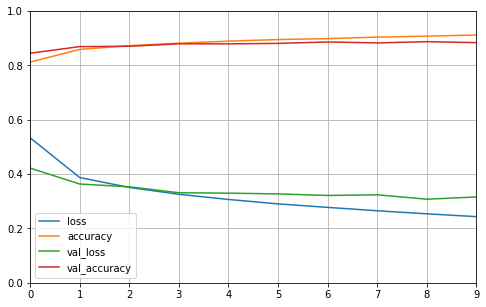

In [6]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)

    
    
plot_learning_curves(history)